In [4]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

# Loading Dataset
data = pd.read_excel("LN5kredit-raw.xlsx")

# Separating features (X) and target (Y)
X = data.drop('status', axis=1)  # Assuming 'status' is the column to be predicted
Y = data['status']

X.head()  # Displaying the first few rows of the feature matrix X


,xi,x2
0,1.2,0.3
1,0.8,0.6
2,1.1,1.0
3,0.4,1.0
4,0.5,1.5


In [6]:
clf = Perceptron(max_iter=5,tol=0,random_state=0)
clf.fit(X,Y)

prediksi = clf.predict(X)

print(prediksi)
print(Y)

[1 1 1 0 0]
0    1
1    1
2    1
3    0
4    0
Name: status, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
X_cleaned = X

In [8]:
y_cleaned = Y

In [9]:
# Standarisasi fitur agar model lebih stabil
scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

In [10]:
clf = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.5,
                    max_iter=1000, tol=1e-3, random_state=0)
clf.fit(X_scaled_cleaned, y_cleaned)

SGDClassifier(eta0=0.5, learning_rate='constant', loss='perceptron',
              random_state=0)

In [11]:
# Cek jumlah iterasi hingga konvergen
print(f"Model konvergen dalam {clf.n_iter_} iterasi.")

Model konvergen dalam 7 iterasi.


In [12]:
# Klasifikasi data baru
new_data = np.array([[0.7, 0.6]])
new_data_scaled = scaler.transform(new_data)
new_prediction = clf.predict(new_data_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
# Output hasil prediksi
print(f"Hasil prediksi untuk data {new_data.tolist()} adalah: {'Tidak Bangkrut' if new_prediction[0] == 1 else 'Bangkrut'}")

Hasil prediksi untuk data [[0.7, 0.6]] adalah: Tidak Bangkrut


In [14]:
test = np.array([0.7, 0.6])

test = test.reshape(1, -1)

print(clf.predict(test))

[1]


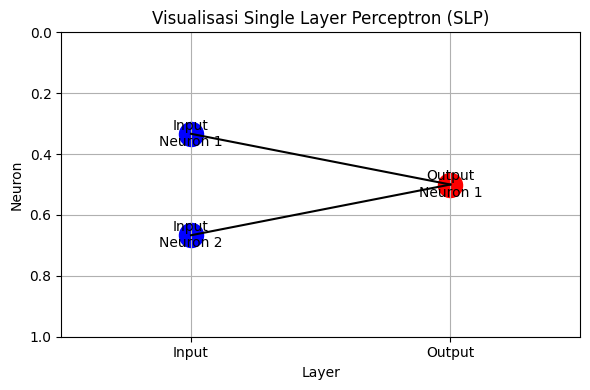

In [15]:
import matplotlib.pyplot as plt

def visualize_slp(input_size, output_size):
    fig, ax = plt.subplots(figsize=(6, 4))

    # Menggambar neuron untuk lapisan input
    for i in range(input_size):
        neuron_x = 1
        neuron_y = (i + 1) / (input_size + 1)
        ax.scatter(neuron_x, neuron_y, color='blue', s=300)
        # Tambahkan teks untuk menunjukkan jumlah neuron di lapisan input
        ax.text(neuron_x, neuron_y, f'Input\nNeuron {i+1}', ha='center', va='center', fontsize=10)

    # Menggambar neuron untuk lapisan output
    for i in range(output_size):
        neuron_x = 2
        neuron_y = (i + 1) / (output_size + 1)
        ax.scatter(neuron_x, neuron_y, color='red', s=300)
        # Tambahkan teks untuk menunjukkan jumlah neuron di lapisan output
        ax.text(neuron_x, neuron_y, f'Output\nNeuron {i+1}', ha='center', va='center', fontsize=10)

    # Menghubungkan neuron antara lapisan input dan output
    for i in range(input_size):
        for j in range(output_size):
            input_neuron_x = 1
            input_neuron_y = (i + 1) / (input_size + 1)
            output_neuron_x = 2
            output_neuron_y = (j + 1) / (output_size + 1)
            ax.plot([input_neuron_x, output_neuron_x], [input_neuron_y, output_neuron_y], color='black')

    ax.set_title('Visualisasi Single Layer Perceptron (SLP)')
    ax.set_xlabel('Layer')
    ax.set_ylabel('Neuron')
    ax.set_xlim(0.5, 2.5)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    ax.grid(True)
    plt.xticks([1, 2], ['Input', 'Output'])
    plt.tight_layout()
    plt.show()

# Contoh struktur lapisan SLP: 4 input, 1 output
input_size = 2
output_size = 1
visualize_slp(input_size, output_size)
